# Aulas 1 e 2: Coleta e organização de dados e Medidas de tendência e dispersão

## Tipos de dados:



Numérico (Quantitativo)
- Contínuo (Faixa)
   - Velocidade de um trem
   - Altura de uma pessoa
   - Tempo para carregar uma página

- Discreto (Contagem)
   - Número de visitantes em um shopping center
   - Número de pessoas que trabalham em uma empresa

- Categórico (Qualitativo)
  - Não ordenável
    - Casado solteiro
    - País de residência

  - Ordinal (ordenado)
    - Primeiro segundo terceiro.




## Medidas de centro:

### A média é a soma de todos os pontos de dados dividida pelo número total de pontos de dados.

### A mediana é o valor médio do conjunto de dados onde 50% dos dados são maiores que a mediana e 50% dos dados são menores que a mediana. É um ponto que está no meio da amostra e não precisa coincidir com a média.

### A moda é dado que mais se repete.

### Exemplo:

Considere o banco de dados retirado do Kaggle: (Students Performance in Exams) no qual serão realizados diversos cálculos ao longo do restante do Notebook.

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


In [3]:
#Exemplo 1:
#importar bibliotecas
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from scipy.stats import skewnorm # Necessário para fazer o gráfico de tendenciosidade.
from scipy import stats

#Carregamos o banco de dados baixado anteriormente na pasta de trabalho.
data = pd.read_csv('./StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Vamos classificar cada uma das variáveis ​​do banco de dados:

**Qualitativo-Nominal:** `Gender` (Gênero), `Race/ethnicity` (Raça), `lunch` (tipo almoço),    `test preparation course` ( Curso de preparação)

**Qualitativo-Ordinal:** `parental level of education`

**Quantitativo- Discreta:** `math score`, 	`reading score`, 	`writing score`

In [4]:
#Vamos notar os diferentes valores da variável ‘nível de escolaridade dos pais’
data['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [5]:
#Calcular a média da variável math score e reading score. Compare essas duas médias.

media_matematica = np.mean(data['math score'])
media_leitura = np.mean(data['reading score'])
escrita = np.mean(data["writing score"])
print(f'A média de matemática é {media_matematica} e a de leitura é {media_leitura} e a de escrita é {escrita}')

A média de matemática é 66.089 e a de leitura é 69.169 e a de escrita é 68.054


In [6]:
# Notamos como o rendimento dos estudante é melhor em leitura do que em matemática.

In [7]:
#Calculemos a mediana de math_score e comparemos com a média.
mediana_matematica = np.median(data['math score'])

print(f'A média de matemática é {media_matematica} e a mediana é {mediana_matematica}')


A média de matemática é 66.089 e a mediana é 66.0


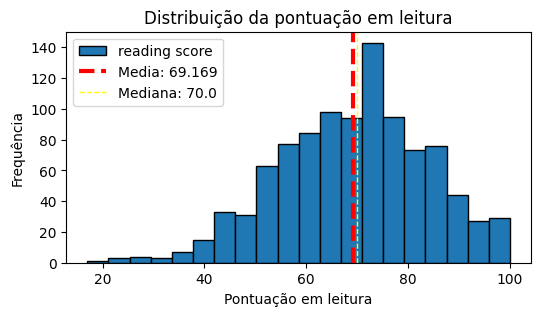

In [8]:
# Criamos o histograma
plt.figure(figsize=(6, 3))

mediana_leitura = np.median(data['reading score'])

data['reading score'].plot.hist(bins=20, edgecolor='black')

#Visualizamos a media:
plt.axvline(media_leitura, color='red', linestyle='dashed', linewidth=3, label=f'Media: {media_leitura}')
plt.axvline(mediana_leitura, color='yellow', linestyle='dashed', linewidth=1,label=f'Mediana: {mediana_leitura}')


plt.legend()
plt.title('Distribuição da pontuação em leitura')
plt.xlabel('Pontuação em leitura')
plt.ylabel('Frequência')
plt.show()


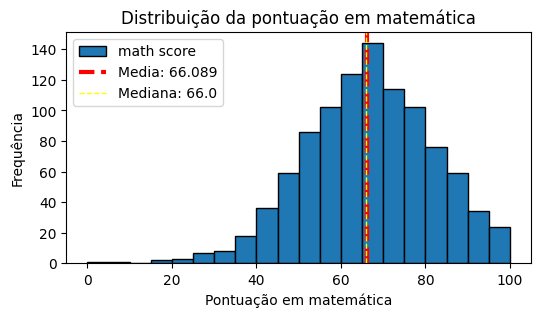

In [9]:
# Notamos como o valor central (mediana) e sua média diferem.
# Podemos fazer um diagrama de barras para verificar que não tem uma tendência nos dados.



# Criamos o histograma
plt.figure(figsize=(6, 3))


data['math score'].plot.hist(bins=20, edgecolor='black')

#Visualizamos a media:
plt.axvline(media_matematica, color='red', linestyle='dashed', linewidth=3, label=f'Media: {media_matematica}')
plt.axvline(mediana_matematica, color='yellow', linestyle='dashed', linewidth=1,label=f'Mediana: {mediana_matematica}')


plt.legend()
plt.title('Distribuição da pontuação em matemática')
plt.xlabel('Pontuação em matemática')
plt.ylabel('Frequência')
plt.show()



'''
Os dados são simétricos em torno da média ou mediana, nenhum tendência é observado na variável pontuação matemática.

Vale ressaltar que a distribuição das pontuações matemáticas segue
uma distribuição normal (formato de sino) que será estudada mais para frente
'''

Também podemos utilizar o método   `.describe()`


Este método fornece um resumo estatístico das colunas de um DataFrame,
incluindo medidas como contagem de linhas, média, desvio padrão,
os valores mínimo e máximo e os percentis.

In [10]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
# A seguir vamos calcular a moda da variável 'parental level of education'
'''Em Python, você pode usar `statistics.mode()` para calcular
o modo de uma lista ou sequência de dados numéricos ou não numéricos.'''

'''Cuidado, podemos ter mais de 1 moda, o melhor é verificar com o value_counts'''

statistics.mode(data['parental level of education'])

'some college'

In [12]:
# Você também pode usar o método .value_counts():
data['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [13]:
#Percebemos como o valor que mais se repete é ‘some college com 226 registros’

### Exemplo: (A média é suscetível a valores discrepantes)

Numa empresa que possui três funcionários, existe a seguinte estrutura salarial mensal:

- Dois programadores ganham \$ 3.000 cada.
- Um supervisor ganha $ 20.000.

Todos os salários são expressos em dólares. Determine os salários médios e medianos. Explique como o salário é afetado pelo valor atípico do salário do supervisor.

In [14]:
salarios = [3000,3000,20000]
media_salarios = np.mean(salarios)


mediana_salarios = np.median(salarios)

print(f' A média dos salários é {media_salarios} e a mediana é {mediana_salarios}')

 A média dos salários é 8666.666666666666 e a mediana é 3000.0


O salário do supervisor é significativamente maior do que o dos outros funcionários (quase 7 vezes dos programadores), o que o torna um valoro atípico.

Este valor atípico tem um impacto considerável nos salários médios, elevando-os para \$ 8.666,67, o que é muito superior à maioria dos restantes salários (3.000).

Porém, a mediana, sendo \$ 3.000, reflete melhor o salário típico da empresa, pois não é afetada por valores extremamente altos ou baixos.

Isto mostra como os valores discrepantes podem distorcer a média, tornando-a menos representativa daquilo que a maioria dos funcionários realmente recebe, enquanto a mediana pode oferecer uma melhor representação da tendência central na presença de valores discrepantes.

### Comparação entre a média e a mediana.

A forma de uma distribuição determina se a média é maior ou menor que a mediana. Em geral, se a forma da distribuição for:

- Perfeitamente simétrico, a média é igual à mediana.
- Inclinada para a esquerda, a média é menor que a mediana.
- Inclinada para a direita, a média é maior que a mediana.

O gráfico a seguir ilustra esta situação:

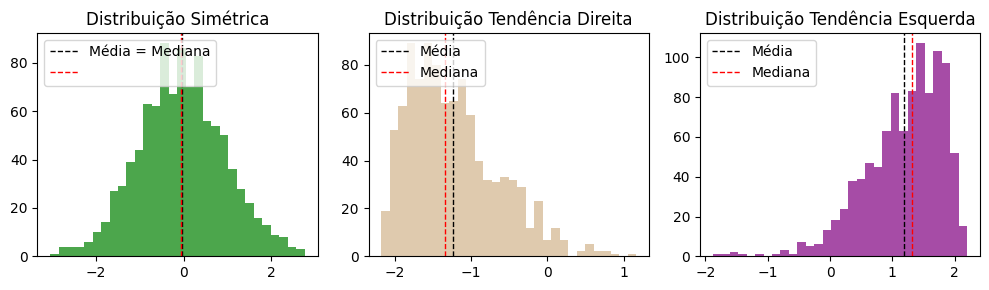

In [15]:
# Código para gerar o gráfico.
# Gerar dados para distribuições
np.random.seed(0)
data_symmetric = np.random.normal(loc=0, scale=1, size=1000)  # Distribuição simétrica
data_left_skewed = skewnorm.rvs(a=10, loc=-2, scale=1, size=1000)  # Distribuição tendenciosa para a esquerda
data_right_skewed = skewnorm.rvs(a=-10, loc=2, scale=1, size=1000)  # Distribuição tendenciosa para a direita

# Criar figuras para as distribuições
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Títulos para cada subgráfico
titles = ['Distribuição Simétrica', 'Distribuição Tendência Direita', 'Distribuição Tendência Esquerda']
sesgo = [data_symmetric, data_left_skewed, data_right_skewed]
colors = ['green', 'tan', 'purple']

for ax, datum, title, color in zip(axs, sesgo, titles, colors):
    ax.hist(datum, bins=30, color=color, alpha=0.7)
    ax.axvline(datum.mean(), color='k', linestyle='dashed', linewidth=1)
    ax.axvline(np.median(datum), color='r', linestyle='dashed', linewidth=1)
    ax.set_title(title)

# Legendas
axs[0].legend(['Média = Mediana', ''], loc='upper left')
axs[1].legend(['Média', 'Mediana'], loc='upper left')
axs[2].legend(['Média', 'Mediana'], loc='upper left')

plt.tight_layout()
plt.show()

# Medidas de Dispersão

### Amplitude:
A amplitude é a diferença entre o valor máximo e o valor mínimo, quanto maior a amplitude, mais dispersos estão os dados.

### Desvio padrão:

O desvio padrão é uma medida de dispersão que indica a que distância os dados individuais estão da média.


In [16]:
#Calculemos a amplitude da variável reading score
Amplitude = data['reading score'].max()-data['reading score'].min()
print(Amplitude)

83


In [17]:
Amplitude2 = data['math score'].max()-data['math score'].min()
print(Amplitude2)

100


In [18]:
Amplitude3 = data['writing score'].max()-data['writing score'].min()
print(Amplitude3)

90


In [19]:
# O intervalo é 83, que corresponde ao que mostra a tabela obtida anteriormente com o método .describe()

### Quartis e outros percentis

O desvio padrão é a medida de dispersão mais comumente usada;

No entanto, existem outras maneiras de caracterizar a variabilidade ou dispersão em um conjunto de dados.

Uma dessas envolve identificar os valores que dividem um conjunto de observações em porções iguais, utilizando medidas como quartis, decis e percentis.

Os quantis são uma ferramenta para resumir dados numéricos porque permitem analisar o centro e a distribuição de um conjunto de dados.

Eles também fornecem uma perspectiva clara sobre a posição relativa de um ponto de dados dentro do conjunto total.

Por exemplo, você pode oferecer um desconto para 10% dos usuários mais ativos de um site.



In [20]:
# Calcula os quartis de math score
print(np.quantile(data['math score'],[0, 0.25, 0.5, 0.75, 1]))

[  0.  57.  66.  77. 100.]


In [21]:
print(np.quantile(data['reading score'],[0, 0.25, 0.5, 0.75, 1]))

[ 17.  59.  70.  79. 100.]


In [22]:
print(np.quantile(data['writing score'],[0, 0.25, 0.5, 0.75, 1]))

[ 10.    57.75  69.    79.   100.  ]


### Interpretação:
Os quartis resultantes [0, 57, 66, 77, 100] representam pontos de divisão que organizam os resultados dos testes de matemática em intervalos contendo aproximadamente a mesma quantidade de dados.

1. **Mínimo (quartil 0%):** O valor mínimo nos resultados do teste é 0. Isso indica que a pontuação mais baixa obtida foi 0.

2. **Primeiro quartil (Q1, quartil 25%):** 25% dos alunos obtiveram pontuação igual ou inferior a 57 no teste. Isso significa que o primeiro quartil está em 57, que é o limite onde 25% das pontuações ficam abaixo.

3. **Mediana (Q2, quartil de 50%):** A mediana, ou segundo quartil, é 66. Isso indica que 50% dos alunos obtiveram pontuação de 66 ou menos. A mediana divide o conjunto de dados em duas partes iguais.

4. **Terceiro quartil (Q3, quartil 75%):** 75% dos alunos obtiveram pontuação de 77 ou menos. O terceiro quartil, 77, mostra que três quartos das pontuações estão abaixo deste valor.

5. **Máximo (quartil 100%):** O valor máximo nos resultados do teste é 100. Isso indica que a pontuação mais alta obtida foi 100.


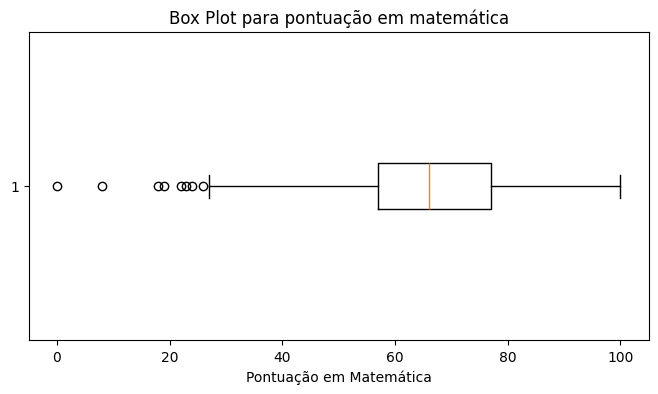

In [23]:
#O box plot permite visualizar melhor estes resultados:
# Cria o box plot
plt.figure(figsize=(8, 4))  # Ajuste o tamanho do gráfico conforme necessário
plt.boxplot(data['math score'],vert=False)
plt.title('Box Plot para pontuação em matemática')
plt.xlabel('Pontuação em Matemática')
plt.show()

### Observação:

**Outliers** podem influenciar significativamente estatísticas como média, variância e desvio padrão.

Por outro lado, o intervalo interquartil, conhecido como IQR, oferece uma alternativa para medir a dispersão menos suscetível aos efeitos de outliers. Esta medida também é comumente usada para identificar tais valores. Em termos práticos, um valor é considerado outlier se estiver abaixo de `Q1 - 1,5 * IQR` ou acima de `Q3 + 1,5 * IQR`, onde Q1 e Q3 representam o primeiro e terceiro quartis, respectivamente. Este critério é usado para determinar o comprimento dos bigodes em um box plot no matplotlib.


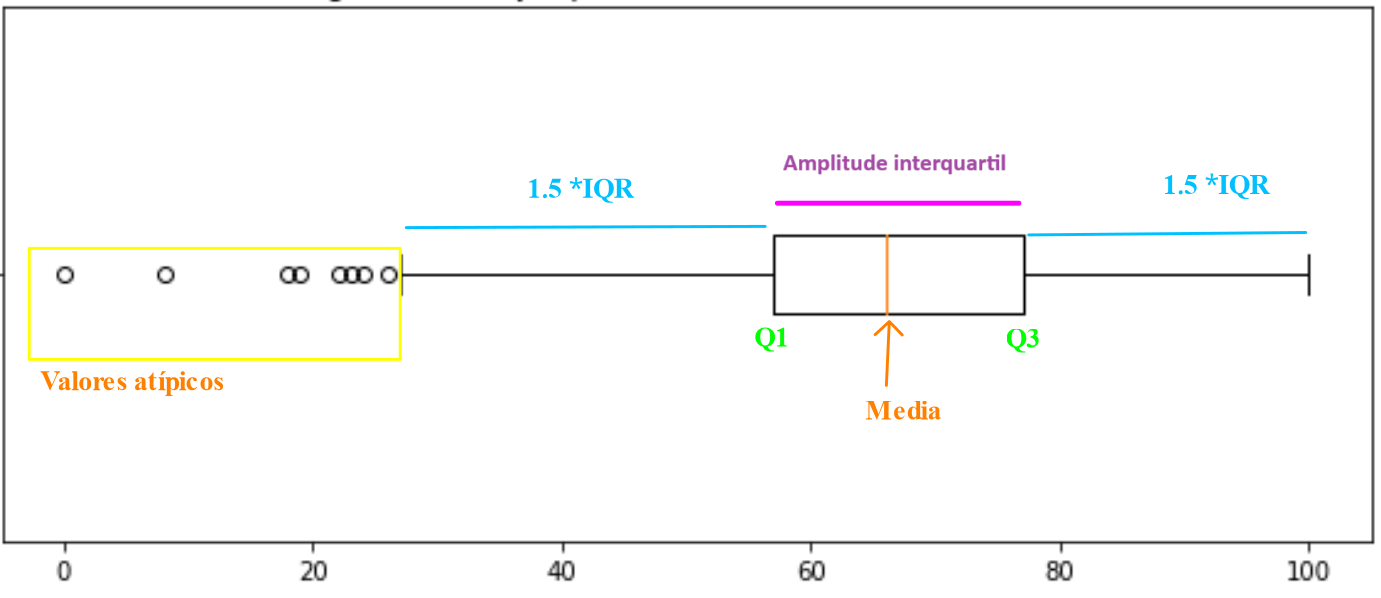

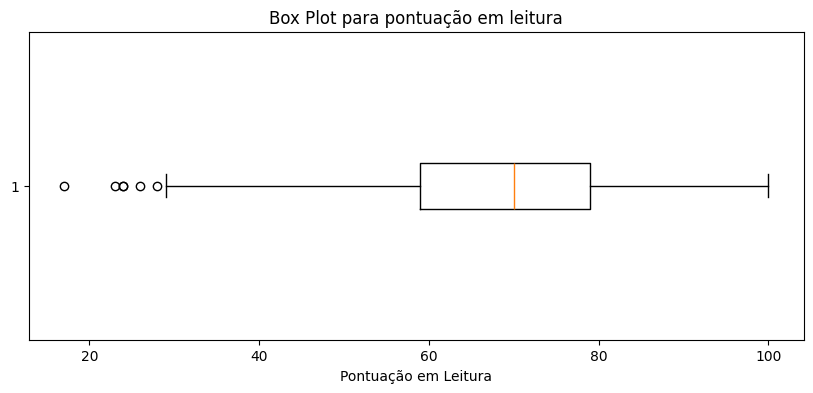

In [24]:
plt.figure(figsize=(10, 4))  # Ajuste o tamanho do gráfico conforme necessário
plt.boxplot(data['reading score'],vert=False)
plt.title('Box Plot para pontuação em leitura')
plt.xlabel('Pontuação em Leitura')
plt.show()

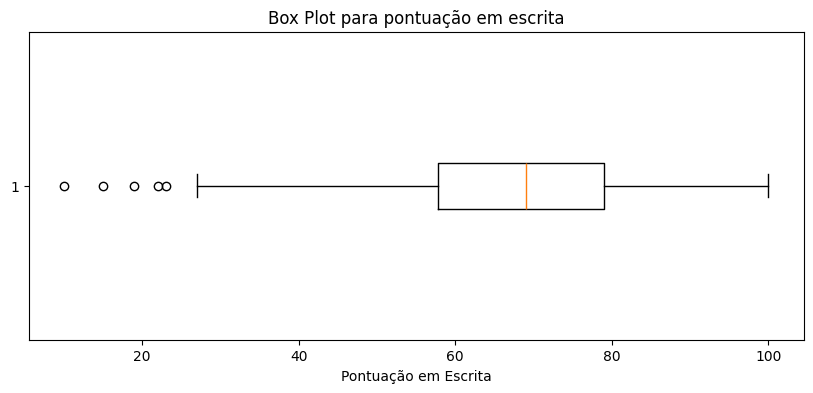

In [25]:
plt.figure(figsize=(10, 4))  # Ajuste o tamanho do gráfico conforme necessário
plt.boxplot(data['writing score'],vert=False)
plt.title('Box Plot para pontuação em escrita')
plt.xlabel('Pontuação em Escrita')
plt.show()

##  Outras medidas

### Média ponderada

Em diversas situações, nem todos os valores têm a mesma relevância, por isso pode ser benéfico atribuir pesos aos dados com base na sua importância para um estudo específico. Neste contexto, não é realizada uma simples soma dos valores, mas sim calculada uma **soma ponderada**. Ao dividir essa soma pelo total dos pesos atribuídos, obtemos a **média ponderada**.

$${\bar  {x}}={\frac  {\sum\limits_{{i=1}}^{n}x_{i}w_{i}}{\sum\limits_{{i=1}}^{n}w_{i}}}={\frac  {x_{1}w_{1}+x_{2}w_{2}+x_{3}w_{3}+...+x_{n}w_{n}}{w_{1}+w_{2}+w_{3}+...+w_{n}}}$$

onde

- $ \bar{x} $: É a média ponderada dos dados.
- $ x_i $: Representa o valor do i-ésimo dado no conjunto.
- $ w_i $: É o peso atribuído ao i-ésimo dado, refletindo a sua importância ou relevância no cálculo da média.
- $ n $: É o número total de dados no conjunto.
- $ \sum $: É o operador de adição que serve para somar as multiplicações dos valores pelos seus respectivos pesos e também para somar todos os pesos.


### Média geométrica

A média geométrica é utilizada em situações em que as variações têm caráter multiplicativo e não aditivo, como no caso de taxas de crescimento, retornos financeiros ou qualquer outro fenômeno em que as variações se acumulem proporcionalmente e não adicionalmente. Por exemplo, se estivermos a calcular o retorno médio de um investimento ao longo de vários períodos, a média geométrica seria mais apropriada do que a média aritmética, uma vez que reflete a forma como os retornos são multiplicados em vez de simplesmente somados.

$${\displaystyle {\bar {x}}={\sqrt[{n}]{\prod _{i=1}^{n}{x_{i}}}}={\sqrt[{n}]{x_{1}\cdot x_{2}\cdots x_{n}}}}$$

### Média truncada (Trimmed Mean)

Para calcular uma média truncada, elimine alguns dos valores mais altos e mais baixos e calcule a média com os pontos restantes. Uma média truncada de 10% é obtida eliminando os 5% dos valores mais baixos e os 5% dos valores mais altos do conjunto de dados. Uma média truncada de 50% é calculada eliminando os 25% superiores e inferiores dos valores e calculando a média das pontuações que sobram.

### Desvio da média

A desviação da média absoluta é a média dos valores absolutos das distâncias entre cada valor no conjunto de dados e na média.

$$ D_m = \frac{1}{n} \sum_{i=1}^n
 \left| x_i - \overline{x} \right|$$


### Desvio da Mediana

O desvio médio absoluto $ D_{me} $ é a mediana dos valores absolutos das distâncias entre cada valor no conjunto de dados e na média.

 $$ D_{me} = MD(
 {\left| x_i - \overline{x} \right|}_{i=1,...,n})$$

Esta medida ajuda a entender quando os dados estão dispersos ao redor da média.

Esta medida calcula a mediana dos desvios absolutos de cada valor em um conjunto de dados a respeito da média do conjunto.

Nota: $MD(\cdot) $ Indica a mediana dos valores dentro de $(\cdot).$


O desvio absoluto mediano é especialmente útil porque é menos sensível a valores extremos ou discrepantes em comparação com outras medidas de dispersão, como o desvio padrão. Ao calcular os desvios medianos, você minimiza o impacto de valores extremos que poderiam distorcer a percepção de dispersão em um conjunto de dados. Isto torna $D_{me}$ uma ferramenta robusta e confiável para descrever a variabilidade em vários contextos estatísticos.

### Coeficiente de dispersão de Pearson

Medição da dispersão adimensional, que é expressa tanto decimal quanto em porcentagem, e expressaria o desvio padrão em porcentagem em relação à média.

 $$ CV = \dfrac{\sigma}{\bar x}$$

## Exemplos resolvidos:

### Exemplo 1:

Num jogo de basquete entre um grupo de 10 amigos, a cena se complica quando Carlos, fã de estatísticas, manifesta seu descontentamento em relação à formação dos times. Atento aos números, ele argumenta que a altura média de uma equipe supera a da outra. Diante desse dilema, o desafio é calcular meticulosamente a altura média de todo o grupo e de cada uma das equipes separadamente.

A partir dos dados fornecidos, calcule a altura média de todos os integrantes e de cada uma das equipes para confirmar ou refutar a hipótese de Carlos.

Equipe 1: 170, 165, 178, 160, 175

Equipe 2: 175, 179, 168, 178, 163

In [26]:
equipe1= [170, 165, 178, 160, 175]
equipe2= [175, 179, 168, 178, 163]
total= []

In [27]:
media1= np.mean(equipe1)
media2= np.mean(equipe2)
print(f'A média da Equipe 1 é {media1} e a média da Equipe 2 é {media2}')

A média da Equipe 1 é 169.6 e a média da Equipe 2 é 172.6


In [28]:
print(np.std(equipe1))
print(np.std(equipe2))

6.529931086925803
6.151422599691879


### Exemplo 2:
Você foi designado para desenvolver um aplicativo móvel que rastreia o tempo gasto pelo usuário em exercícios físicos. Os dados registrados de um usuário, que refletem o número de minutos que o aplicativo gastou todos os dias durante um período de 10 dias, são apresentados abaixo:

91, 76, 80, 113, 110, 80, 76, 85, 89, 93


Calcule a mediana dos dados.

In [29]:
minutos = [91, 76, 80, 113, 110, 80, 76, 85, 89, 93]
np.median(minutos)

np.float64(87.0)

### Exemplo 3:

Você recebeu a tarefa de analisar as vendas diárias de painéis solares de uma empresa durante um período. Os dados coletados são apresentados a seguir. Sua tarefa é calcular a moda, ou seja, determinar o valor que aparece com mais frequência nas vendas diárias.

0, 4, 10, 15, 19,
0, 4, 10, 15, 19,
2, 6, 11, 15, 20,
2, 8, 14, 16, 22.

In [30]:
vendas = [0, 4, 10, 15, 19, 0, 4, 10, 15, 19, 2, 6, 11, 15, 20, 2, 8, 14, 16, 22]

In [31]:
# Como numpy não há função que calcule a moda. Você pode usar o pacote de estatísticas.

moda = statistics.mode(vendas)
print(moda)

15


In [32]:
#Com o método .value_counts() podemos determinar a frequência de cada um dos valores

df_values = pd.DataFrame(vendas)
df_values.value_counts()

0 
15    3
2     2
4     2
10    2
0     2
19    2
6     1
8     1
11    1
14    1
16    1
20    1
22    1
Name: count, dtype: int64

### Exemplo 4:

Para cada uma das seguintes situações, você usaria a mediana ou a média para descrever o centro dos dados?

Porque? (Pense na forma provável da distribuição..)


a. Salário dos funcionários de uma empresa.

b. Tempo gasto em um exame difícil.

c. Pontuações em um teste padronizado.

d. Número de solicitações para redefinir senhas de contas de e-mail individuais.

##### Solução


a. . Neste caso, é conveniente utilizar a mediana, pois alguns salários elevados podem afetar a média. A curva de distribuição seria distorcida para a direita.

b. Neste caso, a mediana é mais conveniente, visto que algumas pessoas podem demorar mais, o que faria com que a curva ficasse inclinada para a esquerda.

c. A média, dado que neste tipo de situação os resultados de ambos os lados da média tendem a ser simétricos. A curva de distribuição é simétrica.

d. Mediana. A maior parte do número de solicitações tende a ser baixa, apenas algumas contas teriam um número elevado de solicitações. A distribuição seria distorcida para a direita.

### Exemplo 5: Considere as seguintes observações:

Grupo 1: 8,9,10,11,12

Grupo 2: 8,9,10,11,100

Grupo 3: 8,9,10,11,1000

Encontre a média e a mediana de cada um desses grupos.

Que conclusões você pode tirar desses resultados?

#### Solução

In [33]:
#Definir os dados em um DataFrame
data = {
    'Grupo 1': [8, 9, 10, 11, 12],
    'Grupo 2': [8, 9, 10, 11, 100],
    'Grupo 3': [8, 9, 10, 11, 1000]
}

df = pd.DataFrame(data)

# Função para calcular média e mediana usando apply
def calcular_estatisticas(grupo):
    media = grupo.mean()
    mediana = grupo.median()
    return pd.Series([media, mediana], index=['Média', 'Mediana'])

#Aplica a função a cada coluna do DataFrame
resultados = df.apply(calcular_estatisticas)
print(resultados)

         Grupo 1  Grupo 2  Grupo 3
Média       10.0     27.6    207.6
Mediana     10.0     10.0     10.0


### Notemos como a mediana não muda na presença de um outlier.

### Mas a média é afetada por esse valor atípico.

### Exemplo 6:

Observe os gráficos de pontos para três conjuntos de dados.

a. Para quais conjuntos de dados, se houver, você esperaria que a média e a mediana fossem iguais? Explique por quê.

b. Para quais conjuntos de dados, se houver, você esperaria que a média e a mediana fossem diferentes? O que seria maior, a média ou a mediana? Porque?

---

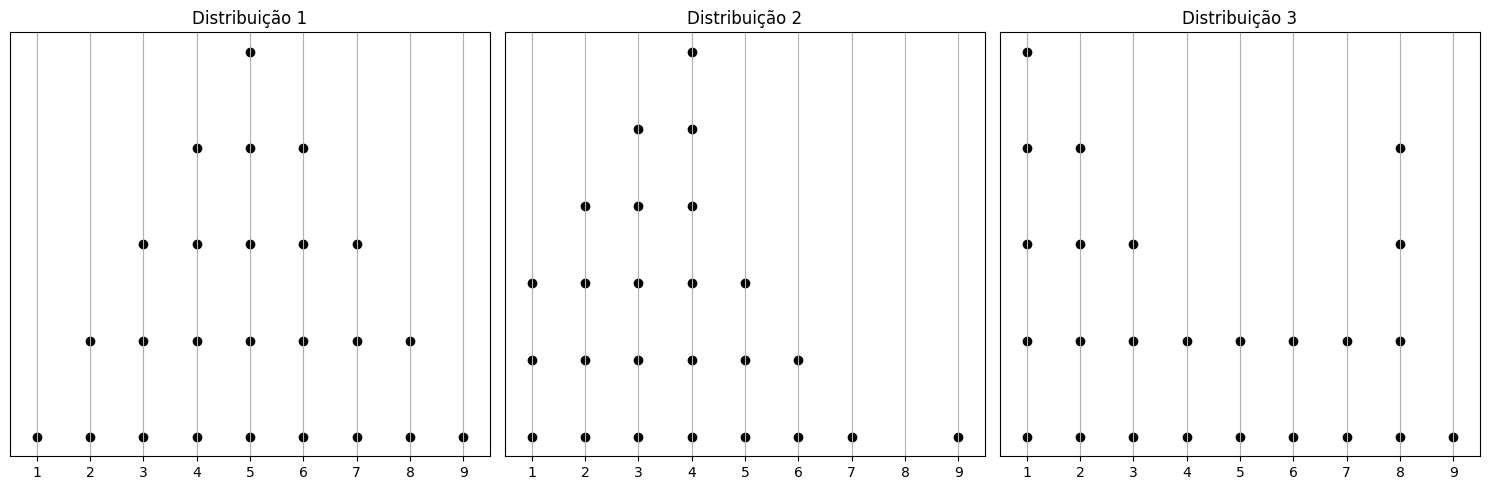

In [34]:
# Código do gráfico
# Dados simulados
data_numbers = {
    'Distribuição 1': np.array([1,2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,7,7,7,8,8,9]),
    'Distribuição 2': np.array([1,1,1,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4,5,5,5,6,6,7,9]),
    'Distribuição 3': np.array([1,1,1,1,1,2,2,2,2,3,3,3,4,4,5,5,6,6,7,7,8,8,8,8,9])
}

# Criar as figuras e os eixos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gerar cada um dos gráficos
for ax, (title, values) in zip(axs, data_numbers.items()):
    # Contar a frequência de cada valor
    unique, counts = np.unique(values, return_counts=True)
    y = np.concatenate([np.arange(count) for count in counts])
    x = np.concatenate([np.full(count, item) for item, count in zip(unique, counts)])

    # Criar o gráfico de dispersão
    ax.scatter(x, y, c='black')
    ax.set_title(title)
    ax.set_xticks(np.arange(1, 10))
    ax.set_yticks([])
    ax.set_xlim(0.5, 9.5)
    ax.grid(True)

# Mostrar gráfico
plt.tight_layout()
plt.show()


### Solução:


a **Igualdade de média e mediana**:

  - Distribuição 1: que para este conjunto de dados, a média e a mediana fossem iguais ou muito próximas. Olhando para a distribuição, ela parece simétrica em relação ao centro do intervalo de dados. Os pontos estão distribuídos uniformemente em torno do centro, indicando que o efeito dos valores nos extremos se equilibra.

b. **Diferença entre média e mediana**:

   - **Distribuição 2**: Neste conjunto, espera-se que a média e a mediana sejam diferentes. A presença do valor discrepante em 9 (muito longe do centro da distribuição) provavelmente puxará a média para um valor superior à mediana. Como a mediana é mais robusta para valores discrepantes, ela refletirá um ponto central que é mais representativo da maioria dos dados, enquanto a média será maior devido ao valor discrepante     elevado.

   - **Distribuição 3**: Assim como na Distribuição 2, espera-se que a média seja maior que a mediana. Embora os dados pareçam ligeiramente simétricos, a presença de múltiplos valores nos extremos superiores (especialmente agrupando-se em torno de 8 e um valor em 9) tende a aumentar mais a média do que a mediana. Isso ocorre porque a mediana, que ficaria no meio do intervalo de dados (provavelmente entre 4 e 5), não é afetada por esses valores extremos superiores tanto quanto a média.

### Exemplo 7:


Você trabalha em uma empresa localizada no centro da cidade e tem a tarefa de resolver o problema do alto consumo de gasolina pelos funcionários, situação que se agrava devido à expansão urbana, ao trânsito e ao uso de veículos grandes e ineficientes. Para promover o uso do transporte público, você decidiu investigar quantos quilômetros seus funcionários percorrem em transporte público durante um dia normal. Os valores para os seus 10 colaboradores (registados ao km mais próximo) são os seguintes:

0, 0, 4, 0, 0, 10, 0, 6, 0, 0.

a. Calcule e interprete a média, mediana e moda.

b. Recentemente foi contratado um funcionário adicional que reside em outra cidade e viaja 145 quilômetros por dia de transporte. Recalcule a média e a mediana e descreva o efeito desse valor discrepante.

In [35]:


# Dados originais
kilometros = np.array([0, 0, 4, 0, 0, 10, 0, 6, 0, 0])

# Calcular media, mediana e moda
media_original = np.mean(kilometros)
mediana_original = np.median(kilometros)
moda_original = stats.mode(kilometros)  # A função mode devolve também a frequência

# Adicionar o valor atípico
dados_atipico = np.append(kilometros, 145)

# Recalcular média e mediana com valor discrepante
media_nova = np.mean(dados_atipico)
mediana_nova = np.median(dados_atipico)

print(f"Média original: {media_original}")
print(f"Mediana original: {mediana_original}")
print(f"Moda original: {moda_original}")
print("Depois de adicionar o valor atípico:")
print(f"Média nova: {media_nova}")
print(f"Mediana nova: {mediana_nova}")

Média original: 2.0
Mediana original: 0.0
Moda original: ModeResult(mode=np.int64(0), count=np.int64(7))
Depois de adicionar o valor atípico:
Média nova: 15.0
Mediana nova: 0.0


### Exemplo 8


A figura a seguir mostra histogramas para três amostras, cada uma com tamanho de amostra \( n = 100 \).

Qual amostra tem o (i) maior e (ii) menor desvio padrão?

---

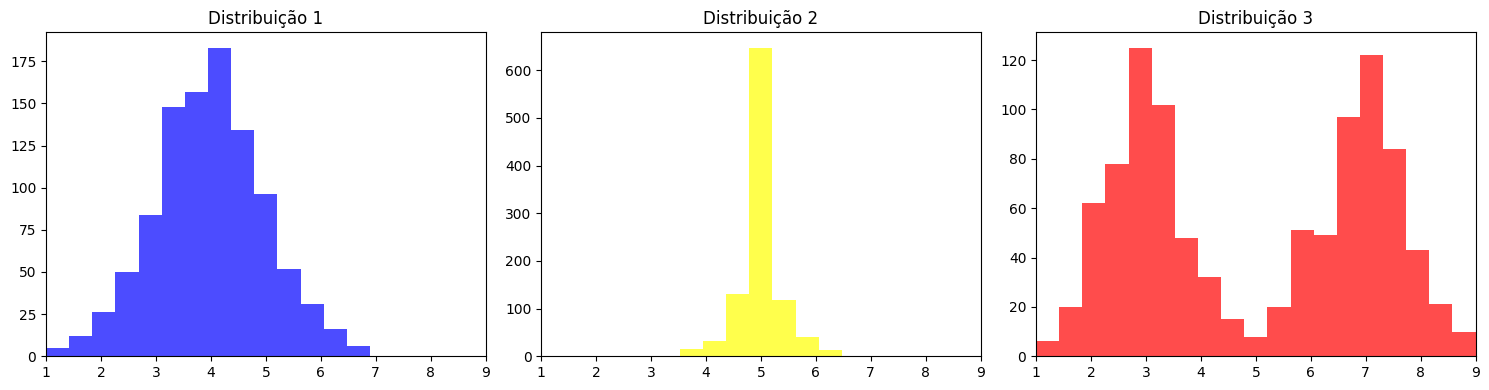

In [36]:
#Codigo da figura

# Dados simulados representando distribuições
data1 = np.random.normal(loc=4, scale=1, size=1000)
data2 = np.random.normal(loc=5, scale=0.5, size=500)
data2 = np.append(data2, np.random.normal(loc=5, scale=0.1, size=500))  # Adicionar pico
data3 = np.random.normal(loc=3, scale=0.8, size=500)
data3 = np.append(data3, np.random.normal(loc=7, scale=0.8, size=500))  # Distribuição bimodal

# Crie a figura e os eixos
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Ajustes para cada histograma
bins = np.linspace(1, 9, 20)  # Bins comum a todos os histogramas para fácil comparação

axs[0].hist(data1, bins=bins, color='blue', alpha=0.7)
axs[0].set_title('Distribuição 1')
axs[0].set_xlim(1, 9)

axs[1].hist(data2, bins=bins, color='yellow', alpha=0.7)
axs[1].set_title('Distribuição 2')
axs[1].set_xlim(1, 9)

axs[2].hist(data3, bins=bins, color='red', alpha=0.7)
axs[2].set_title('Distribuição 3')
axs[2].set_xlim(1, 9)

# Mostrar gráfico
plt.tight_layout()
plt.show()

#### Solução:
    
O maior desvio padrão é encontrado na Distribuição 3, devido à separação entre os dois picos que aumenta a variabilidade global.

A Distribuição 2 tem o desvio padrão mais baixo, em parte porque a grande maioria dos dados está concentrada em torno de uma média com baixa variabilidade, embora o pico estreito aumente ligeiramente o desvio padrão, não o faz o suficiente para ultrapassar a Distribuição 1.

### Exemplo 9:
(Exercício retirado de https://onlinestatbook.com/Online_Statistics_Education.pdf, página 156, exercício 6)

Você registrou o tempo em segundos que 8 participantes levaram para resolver um quebra-cabeça.
Esses horários aparecem abaixo. No entanto, quando os dados foram inseridos no
programa estatístico, a pontuação que deveria ser 22.1 foi inserida como 21.2.

Você calculou as seguintes medidas de tendência central: a média, a
mediana, e a média foi reduzida em 25%. Qual destas medidas de centralidade
a tendência mudará quando você corrigir o erro de gravação?

| Tempo (segundos) |
|:------------:|
| 15.2 |
| 18.8 |
| 19.3 |
| 19.7 |
| 20.2 |
| 21.8 |
| 22.1 |
| 29.4 |

In [37]:
# We create a dictionary
times_participants = {
    'Time': [15.2, 18.8, 19.3, 19.7, 20.2, 21.8, 22.1, 29.4]
}

df = pd.DataFrame(times_participants)

# Mostrar o DataFrame
df

,Time
0,15.2
1,18.8
2,19.3
3,19.7
4,20.2
5,21.8
6,22.1
7,29.4


In [38]:
df.describe()

,Time
count,8.000000
mean,20.812500
std,4.067796
min,15.200000
25%,19.175000
50%,19.950000
75%,21.875000
max,29.400000


### Exemplo 10: (Média ponderada)
Você precisa calcular a nota final com base em diversas atividades avaliadas durante o curso. Cada atividade tem um peso diferente dependendo da sua importância.

As classificações e pesos são mostrados abaixo:


| Avaliação | Avaliação | Peso |
|--------------|--------------|------|
| Exame 1 | 85 | 0.3 |
| Exame 2 | 90 | 0.4 |
| Tarefa | 78 | 0.1 |
| Projeto Final | 92 | 0.2 |

Determine a nota final do aluno usando a média ponderada.

#### Solução:

In [39]:


# Dados das avaliações e seus respectivos pesos
notas = [85, 90, 78, 92]  # notas obtidas
pesos = [0.3, 0.4, 0.1, 0.2]       # Peso de cada nota

# Calculamos a media ponderada, .dot faz multiplicação das duas listas
nota_final = np.dot(notas, pesos) / np.sum(pesos)

print(f"A média final do estudante é: {nota_final:.2f}")


A média final do estudante é: 87.70
